
# <h1 style="font-family: Trebuchet MS; padding: 8 px; font-size: 38px; color: #4A1B8C; text-align: center; line-height: 1.2;"><b>Propensity model for bank </b> <br> EDA of bank customers database

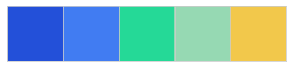

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'

my_colors = ['#2350D9', '#417CF2', '#25D997', '#96D9B3', '#F2C84B']
CMAP1 = ListedColormap(my_colors)

sns.palplot(sns.color_palette(my_colors))

In [2]:
def dataset_info(data):
    # --- Print Dataset Info ---
    print(clr.S+'.: Dataset Info :.'+clr.E)
    print('*' * 30)
    print('Total Rows:'+clr.S, data.shape[0])
    print(clr.E+'Total Columns:'+clr.S, data.shape[1])
    print(clr.E+'*' * 30)
    # --- Print Dataset Detail ---
    print(clr.S+'.: Dataset Details :.'+clr.E)
    print('*' * 30)
    data.info(memory_usage = False)


### Table *D_clients*

In [3]:
df_clients = pd.read_csv('D_clients.csv')
df_clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


Description of customer data:
- ID — record identifier;
- AGE — client's age;
- GENDER — gender of the client (1 — male, 0 — female);
- EDUCATION - education;
- MARITAL_STATUS - marital status;
- CHILD_TOTAL - the number of children of the client;
- DEPENDANTS - the number of dependents of the client;
- SOCSTATUS_WORK_FL — client's social status regarding work (1 — working, 0 — not working);
- SOCSTATUS_PENS_FL — client's social status in relation to pension (1 — pensioner, 0 — non-pensioner);
- REG_ADDRESS_PROVINCE — client registration area;
- FACT_ADDRESS_PROVINCE — area of the client's actual stay;
- POSTAL_ADDRESS_PROVINCE — postal address of the region;
- FL_PRESENCE_FL - the presence of an apartment in the property (1 - yes, 0 - no);
- OWN_AUTO — number of cars owned.

In [4]:
dataset_info(df_clients)

.: Dataset Info :.
******************************
Total Rows: 16000
Total Columns: 14
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16000 non-null  int64 
 1   AGE                      16000 non-null  int64 
 2   GENDER                   16000 non-null  int64 
 3   EDUCATION                16000 non-null  object
 4   MARITAL_STATUS           16000 non-null  object
 5   CHILD_TOTAL              16000 non-null  int64 
 6   DEPENDANTS               16000 non-null  int64 
 7   SOCSTATUS_WORK_FL        16000 non-null  int64 
 8   SOCSTATUS_PENS_FL        16000 non-null  int64 
 9   REG_ADDRESS_PROVINCE     16000 non-null  object
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object
 11  POSTAL_ADDRESS_PROVINCE  16

### Table *D_target*

In [5]:
df_target = pd.read_csv('D_target.csv')
df_target.head()

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


In [6]:
dataset_info(df_target)

.: Dataset Info :.
******************************
Total Rows: 15223
Total Columns: 3
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGREEMENT_RK  15223 non-null  int64
 1   ID_CLIENT     15223 non-null  int64
 2   TARGET        15223 non-null  int64
dtypes: int64(3)

- We have 15223 rows with target value

### Table *D_job*

In [7]:
df_job= pd.read_csv('D_job.csv')
df_job.head()

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


Description of customer job information:
- GEN_INDUSTRY — industry of the client;
- GEN_TITLE — position;
- JOB_DIR - direction of activity within the company;
- WORK_TIME — time of work at the current place (in months);
- ID_CLIENT — client identifier.


In [8]:
dataset_info(df_job)

.: Dataset Info :.
******************************
Total Rows: 15223
Total Columns: 5
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GEN_INDUSTRY  13856 non-null  object 
 1   GEN_TITLE     13856 non-null  object 
 2   JOB_DIR       13856 non-null  object 
 3   WORK_TIME     13855 non-null  float64
 4   ID_CLIENT     15223 non-null  int64  
dtypes: float64(1), int64(1), object(3)

- We have info only for 13856 clients

### Table *D_salary*

In [9]:
df_salary = pd.read_csv('D_salary.csv')
df_salary.head()

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [10]:
dataset_info(df_salary)

.: Dataset Info :.
******************************
Total Rows: 15523
Total Columns: 3
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FAMILY_INCOME    15523 non-null  object 
 1   PERSONAL_INCOME  15523 non-null  float64
 2   ID_CLIENT        15523 non-null  int64  
dtypes: float64(1), int64(1), object(1)

### Table *D_last_credit*

In [11]:
df_credit = pd.read_csv('D_last_credit.csv')
df_credit.head()

,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


In [12]:
dataset_info(df_credit)

.: Dataset Info :.
******************************
Total Rows: 15223
Total Columns: 4
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CREDIT       15223 non-null  float64
 1   TERM         15223 non-null  int64  
 2   FST_PAYMENT  15223 non-null  float64
 3   ID_CLIENT    15223 non-null  int64  
dtypes: float64(2), int64(2)

### Table *D_close_loan*

In [13]:
df_loan = pd.read_csv('D_close_loan.csv')
df_loan.head()

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


In [14]:
dataset_info(df_loan)

.: Dataset Info :.
******************************
Total Rows: 21126
Total Columns: 2
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    21126 non-null  int64
 1   CLOSED_FL  21126 non-null  int64
dtypes: int64(2)

### Table *D_loan*

In [15]:
df_id_loan = pd.read_csv('D_loan.csv')
df_id_loan.head()

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


**Merge loan tables and add new features**

In [16]:
df_loan_full = pd.merge(df_loan, df_id_loan, on='ID_LOAN')
df_loan_full.head()

,ID_LOAN,CLOSED_FL,ID_CLIENT
0,1753790658,1,106804370
1,1753790659,1,106804371
2,1753790660,1,106804372
3,1753790661,0,106804372
4,1753790662,1,106804373


In [17]:
df_loan_full_1 = df_loan_full.groupby('ID_CLIENT').aggregate({'ID_LOAN': 'count'})


In [18]:
df_loan_full_1['LOAN_NUM_CLOSED'] = df_loan_full[df_loan_full['CLOSED_FL']==1].groupby('ID_CLIENT').aggregate({'ID_LOAN': 'count'})

In [19]:
df_loan_full_1 = df_loan_full_1.reset_index()

In [20]:
df_loan_full_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_CLIENT        15223 non-null  int64  
 1   ID_LOAN          15223 non-null  int64  
 2   LOAN_NUM_CLOSED  7432 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 356.9 KB


In [21]:
df_loan_full_1 = df_loan_full_1.rename(columns={"ID_LOAN": "LOAN_NUM_TOTAL"})

## Data preprocess

Merge all tables on ID_CLIENT

In [22]:
data = (df_clients.set_index('ID').merge(df_target, left_index=True, right_on='ID_CLIENT')
        .merge(df_job, how="left", on='ID_CLIENT')
        .merge(df_salary, how="left", on='ID_CLIENT')
        .merge(df_credit, how="left", on='ID_CLIENT')
        .merge(df_loan_full_1, how="left", on='ID_CLIENT'))


In [23]:
data.head(10)

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,...,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,...,Работник сферы услуг,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,5588.0,6,1000.0,1,NaN
1,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,...,Специалист,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0,19498.0,12,0.0,1,NaN
2,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,...,Руководитель высшего звена,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0,15470.0,3,15000.0,1,1.0
3,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,...,Специалист,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,13960.0,6,2500.0,1,NaN
4,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,...,Специалист,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0,11890.0,6,8000.0,2,2.0
5,63,1,Среднее,Состою в браке,2,0,0,1,Иркутская область,Иркутская область,...,NaN,NaN,NaN,от 10000 до 20000 руб.,7800.0,11470.0,6,4000.0,1,1.0
6,32,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,...,Специалист,Участие в основ. деятельности,96.0,от 10000 до 20000 руб.,12000.0,24700.0,12,6160.0,1,NaN
7,52,1,Среднее,Состою в браке,1,0,1,0,Брянская область,Брянская область,...,Специалист,"Бухгалтерия, финансы, планир.",217.0,от 10000 до 20000 руб.,8000.0,11551.0,6,5940.0,3,3.0
8,47,0,Среднее,Состою в браке,2,0,1,0,Рязанская область,Рязанская область,...,Рабочий,Участие в основ. деятельности,10.0,от 10000 до 20000 руб.,10000.0,29990.0,6,10000.0,1,NaN
9,23,1,Среднее специальное,Не состоял в браке,0,0,1,0,Ростовская область,Ростовская область,...,Рабочий,Участие в основ. деятельности,18.0,от 5000 до 10000 руб.,7000.0,7431.0,6,1000.0,1,1.0


In [24]:
dataset_info(data)

.: Dataset Info :.
******************************
Total Rows: 15523
Total Columns: 27
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15523 entries, 0 to 15522
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      15523 non-null  int64  
 1   GENDER                   15523 non-null  int64  
 2   EDUCATION                15523 non-null  object 
 3   MARITAL_STATUS           15523 non-null  object 
 4   CHILD_TOTAL              15523 non-null  int64  
 5   DEPENDANTS               15523 non-null  int64  
 6   SOCSTATUS_WORK_FL        15523 non-null  int64  
 7   SOCSTATUS_PENS_FL        15523 non-null  int64  
 8   REG_ADDRESS_PROVINCE     15523 non-null  object 
 9   FACT_ADDRESS_PROVINCE    15523 non-null  object 
 10  POSTAL_ADDRESS_PROVINCE  15523 non-null  object 
 11  FL_PRESENCE_FL

- There are missed values in `GEN_INDUSTRY`, `GEN_TITLE`, `JOB_DIR`, `WORK_TIME`, `LOAN_NUM_CLOSED`

Check df for dublicates

In [25]:
print('*' * 30)
print(clr.S + '.: Duplicates :.' + clr.E)
print('*' * 30)
print(data.duplicated(keep="first").sum())

******************************
.: Duplicates :.
******************************
300


In [26]:
data.drop_duplicates(keep="first", inplace=True)

Check df for missing values

In [27]:
print('*' * 30)
print(clr.S + '.: Missing values :.' + clr.E)
print('*' * 30)
(pd.DataFrame(data.isna().mean().round(4)*100).sort_values(by=0)[::-1])

******************************
.: Missing values :.
******************************


,0
LOAN_NUM_CLOSED,51.18
WORK_TIME,8.99
JOB_DIR,8.98
GEN_TITLE,8.98
GEN_INDUSTRY,8.98
POSTAL_ADDRESS_PROVINCE,0.00
GENDER,0.00
EDUCATION,0.00
MARITAL_STATUS,0.00
CHILD_TOTAL,0.00


In [28]:
# fill missed values in LOAN_NUM_CLOSED with 0
data['LOAN_NUM_CLOSED'].fillna(0, inplace=True)

- Since we won't use information about work for model training, left these columns as it is

### Categorical columns

In [29]:
data.EDUCATION.value_counts()

Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64

- merge small categories with large ones in meaning

In [30]:
def mapping(row):
    if row.EDUCATION == 'Неоконченное высшее':
        row.EDUCATION = 'Среднее'
    elif row.EDUCATION == 'Два и более высших образования' or row.EDUCATION == 'Ученая степень':
        row.EDUCATION = 'Высшее'
    return row

data = data.apply(mapping, axis='columns')

### Martial status

In [31]:
data.MARITAL_STATUS.value_counts()


Состою в браке        9416
Не состоял в браке    3622
Разведен(а)           1245
Вдовец/Вдова           588
Гражданский брак       352
Name: MARITAL_STATUS, dtype: int64

There is an error value 'Среднее', it's worth dropping these rows

In [32]:
data = data[data.MARITAL_STATUS != 'Среднее']

### Family income

In [33]:
data.FAMILY_INCOME.value_counts()

от 10000 до 20000 руб.    7077
от 20000 до 50000 руб.    6082
от 5000 до 10000 руб.     1512
свыше 50000 руб.           492
до 5000 руб.                60
Name: FAMILY_INCOME, dtype: int64

In [34]:
data[data.FAMILY_INCOME == 'до 5000 руб.'] = 'от 5000 до 10000 руб.'


### Credit

In [35]:
data.CREDIT.value_counts()

3000.0                   79
10000.0                  78
20000.0                  77
от 5000 до 10000 руб.    60
6000.0                   50
                         ..
19254.0                   1
9061.0                    1
44900.0                   1
22121.1                   1
3119.0                    1
Name: CREDIT, Length: 8012, dtype: int64

### Region data

In [36]:
data.REG_ADDRESS_PROVINCE.value_counts()

Краснодарский край             672
Кемеровская область            670
Алтайский край                 453
Читинская область              425
Приморский край                415
                              ... 
Магаданская область             21
Дагестан                         4
Агинский Бурятский АО            2
Усть-Ордынский Бурятский АО      2
Эвенкийский АО                   1
Name: REG_ADDRESS_PROVINCE, Length: 82, dtype: int64

### Children

In [37]:
data.CHILD_TOTAL.value_counts()

1                        5071
0                        4962
2                        4129
3                         791
4                         131
от 5000 до 10000 руб.      60
5                          58
6                          12
7                           5
10                          3
8                           1
Name: CHILD_TOTAL, dtype: int64

In [38]:
data = data[data.CHILD_TOTAL !='от 5000 до 10000 руб.']


In [39]:
data.CHILD_TOTAL = data.CHILD_TOTAL.apply(lambda x: '2 и больше' if x not in [0, 1]  else x)

### Dependants

In [40]:
data.DEPENDANTS.value_counts()

0    8181
1    4523
2    2165
3     242
4      42
5       5
6       4
7       1
Name: DEPENDANTS, dtype: int64

In [41]:
data.DEPENDANTS = data.DEPENDANTS.apply(lambda x: '2 и больше' if x not in [0, 1]  else x)

### LOAN_NUM_TOTAL

In [42]:
data.LOAN_NUM_TOTAL.value_counts()

1     11236
2      2629
3       869
4       273
5       102
6        36
7        14
8         3
11        1
Name: LOAN_NUM_TOTAL, dtype: int64

Drop clients with more then 5 loans, they are probably outliers

In [43]:
data = data[data.LOAN_NUM_TOTAL < 5]

In [44]:
data.OWN_AUTO.value_counts()

0    13270
1     1736
2        1
Name: OWN_AUTO, dtype: int64

since we only have one customer with two cars, let's remove it and make this column categorical

In [45]:
data = data[data.OWN_AUTO != 2]

## Final dataset

In [46]:
columns_to_use = ['AGREEMENT_RK', 'AGE', 'GENDER', 'EDUCATION',
                  'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
                  'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'OWN_AUTO',
                  'FL_PRESENCE_FL', 'FAMILY_INCOME', 'PERSONAL_INCOME',
                  'CREDIT', 'LOAN_NUM_TOTAL',
                  'LOAN_NUM_CLOSED', 'TARGET']

In [47]:
# Generate dictionary to make more readable labels on plots
columns = ['AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS',
           'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
           'OWN_AUTO', 'FL_PRESENCE_FL', 'FAMILY_INCOME', 'PERSONAL_INCOME',
           'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'TARGET']
names = ['Age', 'Gender', 'Education', 'Marital status',
         'Number of children', 'Number of dependants',
         'Work status', 'Pension status', 'Auto owner',
         'Flat owner', 'Family income', 'Personal income',
         'Last loan amount', 'Number of loans', 'Number of closed loans', 'Target']
category_dict = {key: value for (key, value) in zip(columns, names)}

In [48]:
final_data = data[columns_to_use]

In [65]:
final_data.to_csv('final.csv', index=False)

In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15006 entries, 0 to 15522
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AGREEMENT_RK       15006 non-null  object
 1   AGE                15006 non-null  object
 2   GENDER             15006 non-null  object
 3   EDUCATION          15006 non-null  object
 4   MARITAL_STATUS     15006 non-null  object
 5   CHILD_TOTAL        15006 non-null  object
 6   DEPENDANTS         15006 non-null  object
 7   SOCSTATUS_WORK_FL  15006 non-null  object
 8   SOCSTATUS_PENS_FL  15006 non-null  object
 9   OWN_AUTO           15006 non-null  object
 10  FL_PRESENCE_FL     15006 non-null  object
 11  FAMILY_INCOME      15006 non-null  object
 12  PERSONAL_INCOME    15006 non-null  object
 13  CREDIT             15006 non-null  object
 14  LOAN_NUM_TOTAL     15006 non-null  object
 15  LOAN_NUM_CLOSED    15006 non-null  object
 16  TARGET             15006 non-null  objec

In [50]:
final_data[['AGE', 'PERSONAL_INCOME', 'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']] = final_data[['AGE', 'PERSONAL_INCOME', 'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']].astype('int64')

## EDA visualisation

In [51]:
numeric = ['AGE', 'PERSONAL_INCOME', 'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']
categorical = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
            'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'OWN_AUTO',
            'FL_PRESENCE_FL', 'FAMILY_INCOME','TARGET']

### Numeric features

In [52]:
final_data[numeric].describe()

,AGE,PERSONAL_INCOME,CREDIT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,15006.000000,15006.000000,15006.000000,15006.000000,15006.000000
mean,40.374317,13877.002532,14694.536652,1.345595,0.709783
std,11.596373,9035.985742,12155.686503,0.671689,0.892828
min,21.000000,24.000000,2000.000000,1.000000,0.000000
25%,30.000000,8000.000000,6531.750000,1.000000,0.000000
50%,39.000000,12000.000000,11590.000000,1.000000,0.000000
75%,50.000000,17000.000000,19216.000000,2.000000,1.000000
max,67.000000,250000.000000,119700.000000,4.000000,4.000000


It can be noted that the average loan amount is equal to the average value of personal income

In [53]:
def numeric_plot(df, column):
    """
    Function for distplot and boxplot visualization for selected numeric column
    :param df: Dataframe
    :param column: str
    :return: figure
    """
    f, ax = plt.subplots(1, 2, figsize=(10, 4))
    plt.suptitle(f'{category_dict[column]} distribution', fontweight='heavy', fontsize=18,
                 fontfamily='sans-serif', color=my_colors[1], y=1.07)
    sns.distplot(ax=ax[0], x=df[column], hist=True,
                 bins=40,
                 kde=True,
                 vertical=False,
                 color=my_colors[-1],
                 label=category_dict[column])

    ax[0].set_title('Histogram', size=14, weight='bold')
    ax[0].set_ylabel('')
    sns.boxplot(ax=ax[1], x=df[column], color=my_colors[-1])
    ax[1].set_title('Boxplot', size=14, weight='bold')
    ax[1].set_xlabel('')


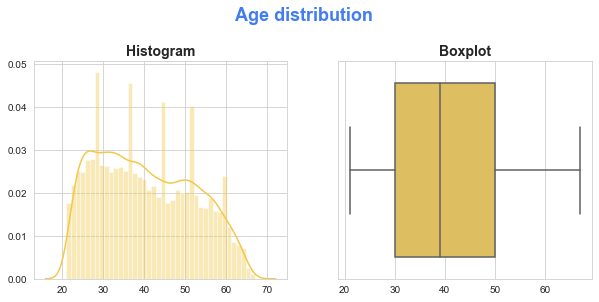

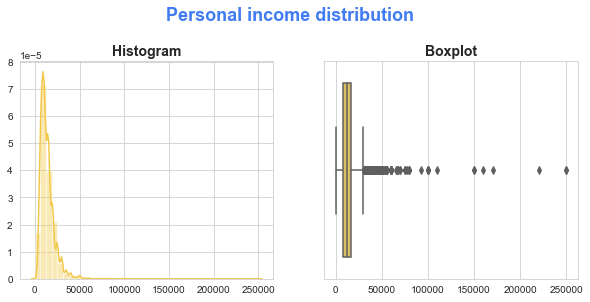

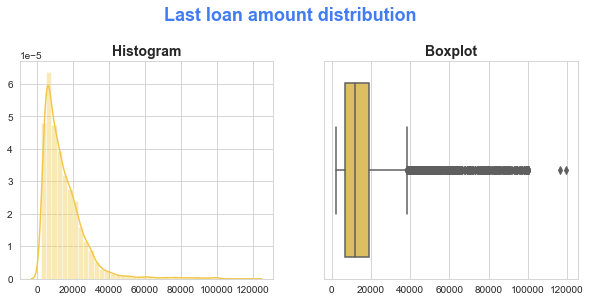

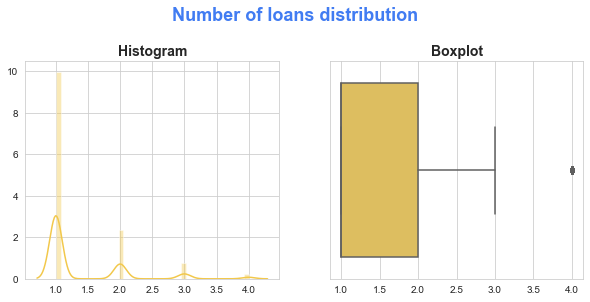

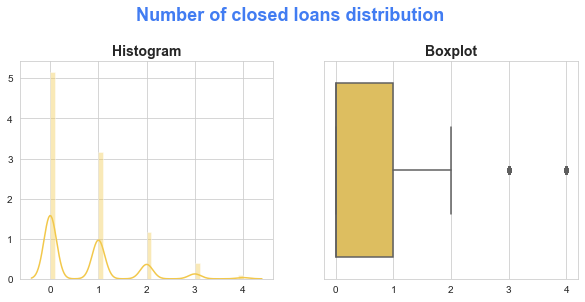

In [54]:
for index, column in enumerate(numeric):
    numeric_plot(final_data, column)


- Long-tailed distributions are observed for `PERSONAL_INCOME` and `CREDIT` columns
- Numbers of loans have outliers
- Age values seem to have two-peaked distribution 

### Categorical features

In [55]:
def category_plot(df, column):
    """
    Function for pie chart and count plot visualization for selected category column
    :param df: Dataframe
    :param column: str
    :return: figure
    """
    f, ax = plt.subplots(1, 2, figsize=(8, 4))
    plt.suptitle(f'{category_dict[column]} distribution', fontweight='heavy', fontsize=18,
                 fontfamily='sans-serif', color=my_colors[2], y=1)
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, colors=my_colors)
    ax[0].set_title('Pie chart', size=14, weight='bold')
    ax[0].set_ylabel('')
    sns.countplot(x=df[column], ax=ax[1], palette=my_colors)
    ax[1].set_title('Histogram', size=14, weight='bold')
    ax[1].set_xlabel('')
    f.tight_layout()
    f.autofmt_xdate()
    

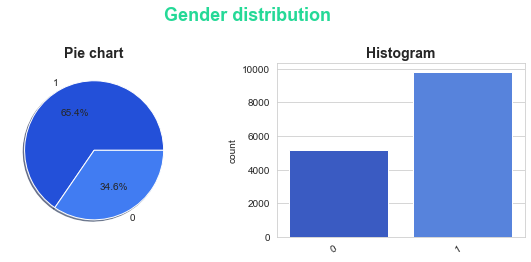

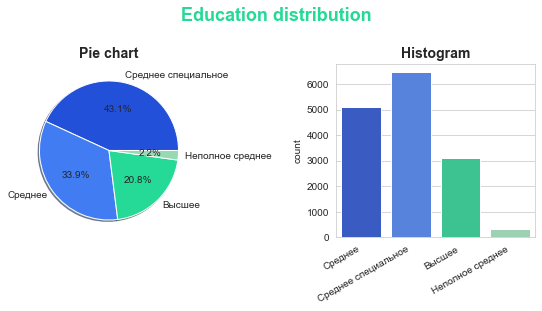

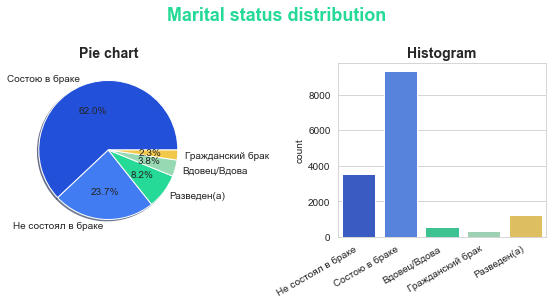

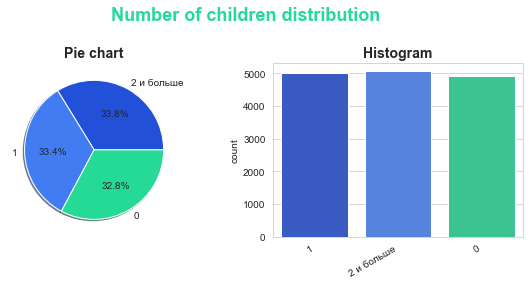

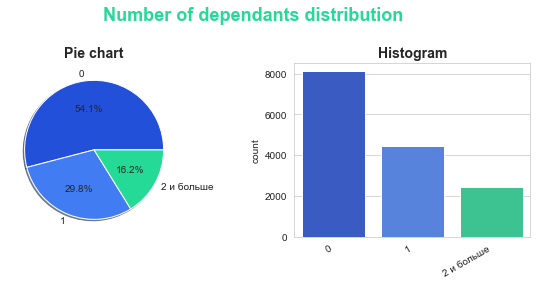

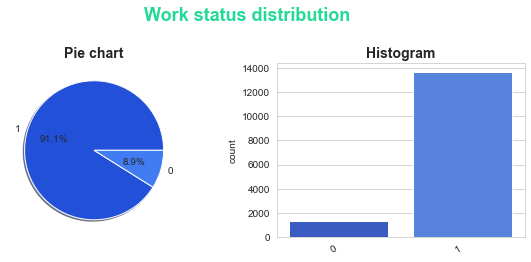

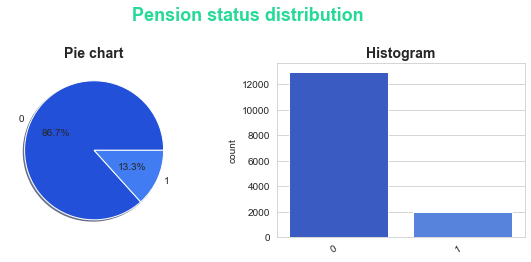

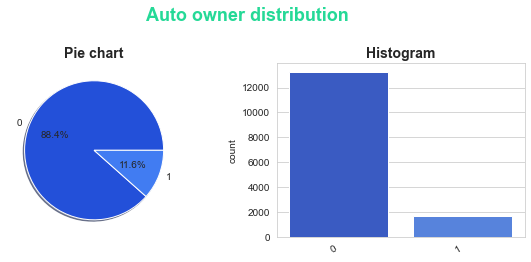

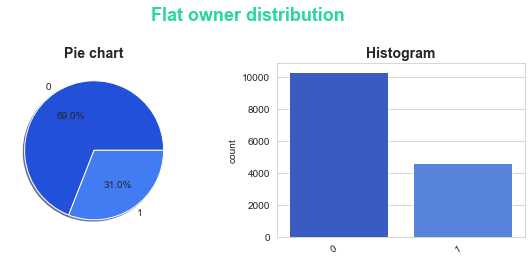

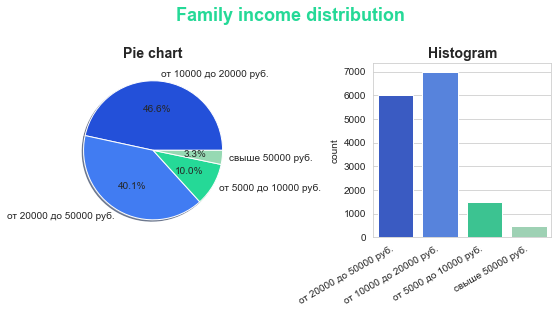

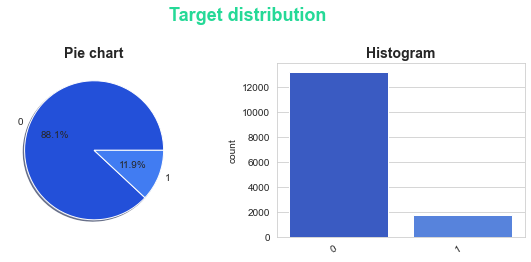

In [56]:
for category in categorical:
    category_plot(final_data, category)

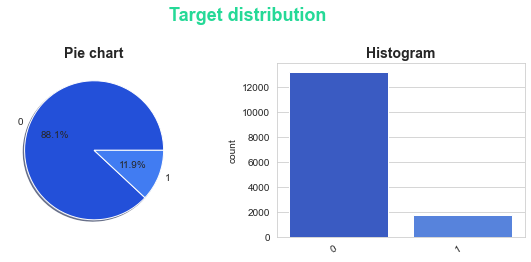

In [57]:
category_plot(final_data, 'TARGET')

**We have unbalanced data:** there are much more clients with no response

### Category vs target

In [58]:
def plot_target(df, column):
    """
    Function for count plot of target and selected category feature
    :param df: DataFrame
    :param column: str
    :return: figure
    """
    f, ax = plt.subplots(figsize=(8, 4))
    ax = sns.countplot(x=df[column], hue=df['TARGET'], data=df, palette=my_colors[3:])
    ax.set_title(f'Target vs {category_dict[column]}', size=18, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    f.tight_layout()
    return f

In [59]:
categorical = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
               'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'OWN_AUTO',
               'FL_PRESENCE_FL', 'FAMILY_INCOME']

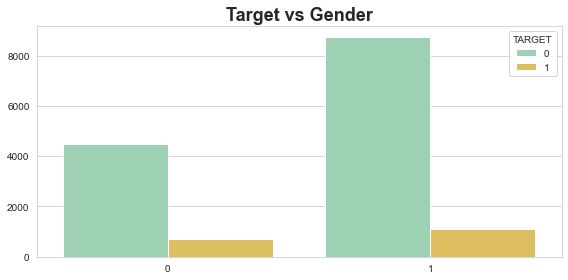

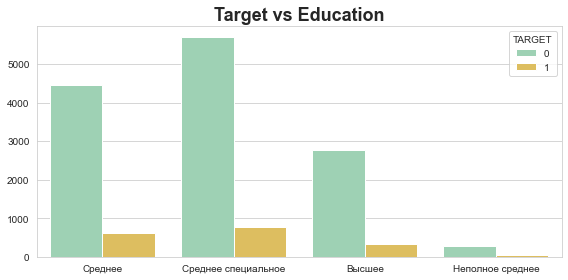

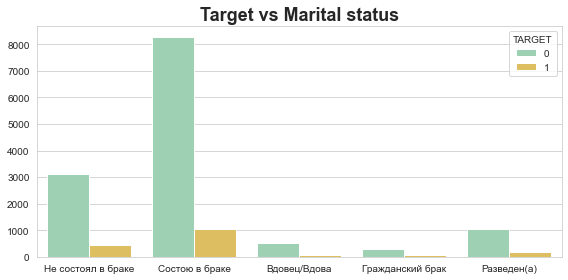

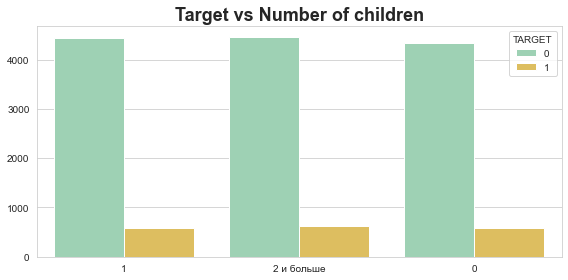

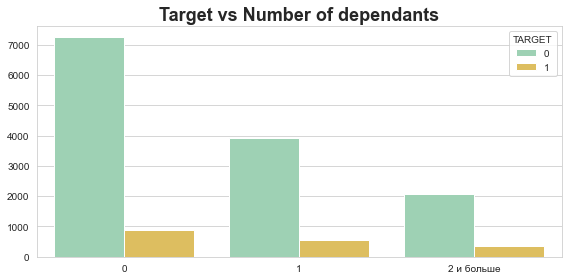

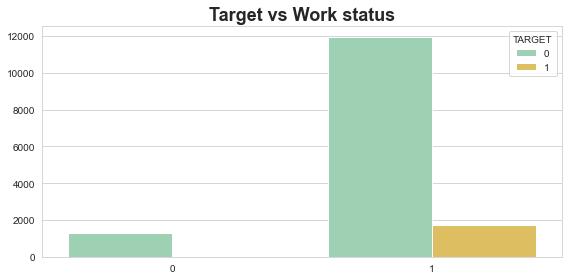

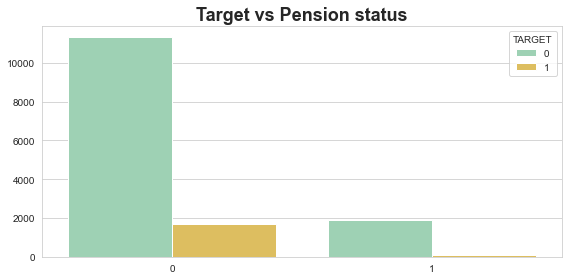

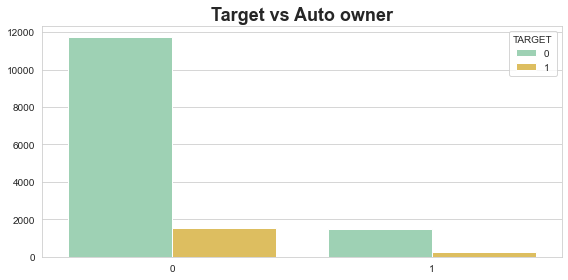

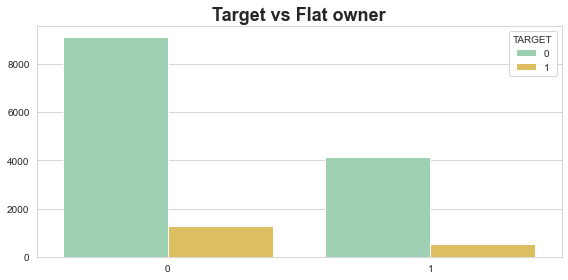

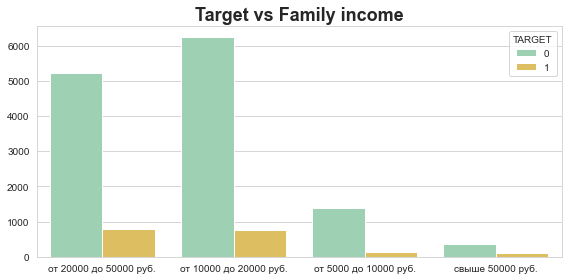

In [60]:
for column in categorical:
    plot_target(final_data, column)


### Scatter plot

In [61]:
def scatter(df, column_x, column_y, gender='all'):
    """
    Function for scatter plot using selected variables
    :param df: DataFrame
    :param column_x: str
    :param column_y: str
    :param gender: str
    :return: figure
    """
    if gender == 'male':
        df = df[df['GENDER'] == 1]
    elif gender == 'female':
        df = df[df['GENDER'] == 0]
    else:
        pass

    f, ax = plt.subplots()
    ax = sns.scatterplot(x=df[column_x],
                         y=df[column_y],
                         hue=df['TARGET'],
                         palette=my_colors[1:3])
    ax.set_xlabel(category_dict[column_x])
    ax.set_ylabel(category_dict[column_y])
    ax.set_title("Scatterplot of bank clients : {}".format(gender), size=18, weight='bold')


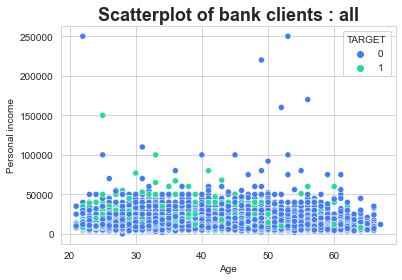

In [62]:
scatter(final_data, 'AGE', 'PERSONAL_INCOME')

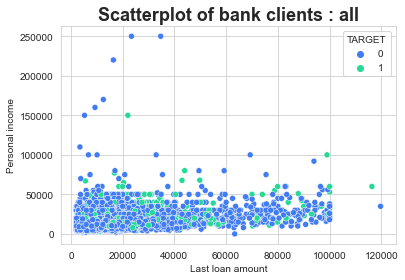

In [63]:
scatter(final_data, 'CREDIT', 'PERSONAL_INCOME')

### Correlation matrix

interval columns not set, guessing: ['AGE', 'PERSONAL_INCOME', 'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']


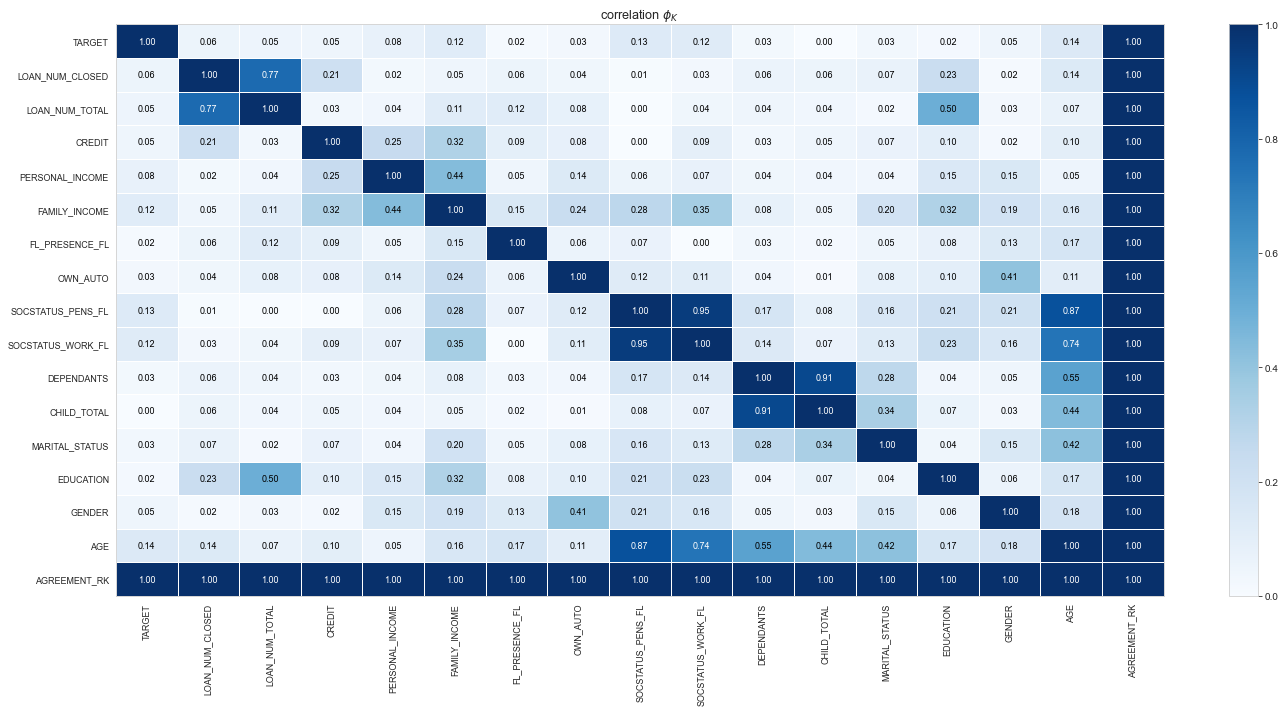

In [64]:
# Phik correlation matrix
from phik.report import plot_correlation_matrix

phik_overview = final_data.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Blues",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.9,
                        figsize=(20, 10))
plt.tight_layout()

Age and pension/work status have strong correlation, obviously. Otherwise, there is no strong correlation between features.